### 5.1 Problem Statement Analysis and Understanding

In order to realize this prediction system it should be defined which type of the sensory system should be used for getting the information /data on the states of the objects that are underwater, which could be stricked the submarine or ship. This sensory system is `SOund NAvigation and Ranging` or `SOnic NAvigation and Ranging`, namely ***Sonar***. As shown in Fig 37, By *`Sending`* of the **ultrasonic waves** the underwater and the *`Receiving`* of the **echoes**, which will be analysed to identify the type and distance of the surrounding objects.

<img src="attachment:31c5b73b-fbc2-4962-b85d-02a2cd833b33.png"  width="80%" height="80%">\
Fig 37 Structre of Sonar system

For building of the related machine learning system it should be collected the echoes of the ultrasonic waves of the considered objects, which should be predicted in the right time to make the approieated  decision such as maneuver.\
In the context of this project the following requirements:
1. The sonar system should be able to distinguish two objects `"Mine"` or `"Rock"`.
2. The `postive state` is `Mine` object and the `nagative state` is `Rock` object.
3. The acquisition of as many positive states (mine prediction) as possible should be achieved regardless of the level of false prediction of the rock object, since the procedures such as maneuvering or stopping in case of the false alarm of the rock object or of the correct alarm of the mine object are safer and less expensive than the procedures or results related to the false prediction of the actual mine object.\
In this confusion matrix (see Table 1) of this project's learning task, the row (highlighted in red) of the object "Mine" is <u>the most heavily weighted class or class of interest</u> during the prediction process; therefore, <u>the ***Recall*** as the ***Evaluation Matrix*** will be used to evalaute the performane of this prediction machine learning project</u>.

|         | Mine | Rock |
|-------- |------|------|
| <span style= 'background:red'> Mine </span>    |   <span style= 'background:red'> TP </span> | <span style= 'background:red'> FN </span>|
| Rock    | FP |  TN   |\
Table 1 Confusion matrix of the Mine-Rock Machine Learning Project  

### 5.2 Data/Information Gathering and Understanding

For the development and building the Mine-Rock prediction system it should be collected the data/information of the related sensory system to learn the suggested machine learning system. This dataset is `Sonar` dataset, `which used by Gorman and Sejnowski in their study of the classification of sonar signals using a neural network [1]. The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.`\
The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

For more information on the sonar dataset, see the following links: (http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rock) or https://www.openml.org/search?type=data&sort=runs&id=40&status=active)

In order to read the `"Sonar Dataset"` the `Pandas` library will be used especially ***pandas.read_csv***, which reads a comma-separated values (csv) file into DataFrame that is *a 2-dimensional labeled data structure with columns of potentially different types.*\
For more information on:
1. pandas.read_csv: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
2. DataFrame: https://pandas.pydata.org/docs/user_guide/dsintro.html).

For using `"Pandas"` library it is should be imported the Pandas-related packages as in the next cell.

In [9]:
#suppress all warnings
import warnings
warnings.filterwarnings("ignore")
#importing the pandas module
import pandas as pd

The OS `"Miscellaneous operating system interfaces"` module will also be imported to read the Sonar dataset from the current working directory and the related files (https://docs.python.org/3/library/os.html).

In [10]:
#importing the OS module
import os
#to get the current working directory
CurentDirectory = os.getcwd()
#to get all the files of the directory current working directory
FilesofCurrentDirectory=os.listdir(CurentDirectory)
#Reading of "sonar.all-data" file as the comma-separated values (csv) file into DataFrame
SonarData=pd.read_csv('sonar.all-data.csv')
#changing the maximum rows and columns number of dispaly of the Data Frame
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999
SonarData

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
5    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
6    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
7    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
8    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
9    0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
10   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
11   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
12   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
13   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
14   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
15   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
16   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
17   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
18   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
19   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
20   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
21   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
22   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
23   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
24   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
25   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
26   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
27   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
28   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
29   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
30   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
31   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
32   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
33   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
34   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
35   0.0094  0.0166  0.0398  0.0359  0.0681  0.0706  0.1020  0.0893  0.0381   
36   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
37   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
38   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
39   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
40   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
41   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
42   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
43   0.0257  0.0447  0.0388  0.0239  0.1315  0.1323  0.1608  0.2145  0.0847   
44   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
45   0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
46   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
47   0.0190  0.0038  0.0642  0.0452  0.0333  0.0690  0.0901  0.1454  0.0740   
48   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422  0.1447  0.0487   
49   0.0353  0.0713  0.0326  0.0272  0.0370  0.0792  0.

### 5.3 Data/Information Preparation

In this step is ***Data Preparation*** including `Exploratory Data Analysis (EDA)`, `Visualization` and `Feature Engineering.`\
Some datasets are difficult for an algorithm to process due to the original format of the raw dataset, missing and/or invalid values; the machine learning algorithm usually needs a very specific format of the dataset to achieve better performance. Therefore, the raw dataset should be preprocessed/prepared/transformed into a format that is suitable for the best possible performance of the selected machine learning algorithm. ***This transformation is the data preparation/preprocessing***.

### 5.3.1 Exploratory Data Analysis (EDA)

After reading the "sonar.all-data" file as a sonar data set, it was found that this data set consists of 207 "Records", "Samples", "Instances" or "Observations", that its columns, which should be "Features/Attributes", are represented by the value, ranging from 0.0 to 1.0, of the energy within a certain frequency band integrated over a certain time period, and that the target attribute is indicated by "M" for "Mine" and by "R" for "Rock".\.

#### 5.3.1.1 Renaming of Rows and Columns of "SonarData" Dataframe

For a clearer presentation and better understanding of the data frame, especially its columns, it is better to rename all columns by "Feature" and its number and column of target variable by "Object_class" as the code in the next cell

In [11]:
#Remaning rows and columns
columns_names = ["Feature "+str(i) for i in range(1,61)]
classes_names=["Object_Class"]
SonarData.columns = columns_names+classes_names
rows_names = ["Sample "+str(j) for j in range(1,208)]
SonarData.index = rows_names
SonarData

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
Sample 1       0.0453     0.0523     0.0843     0.0689     0.1183     0.2583   
Sample 2       0.0262     0.0582     0.1099     0.1083     0.0974     0.2280   
Sample 3       0.0100     0.0171     0.0623     0.0205     0.0205     0.0368   
Sample 4       0.0762     0.0666     0.0481     0.0394     0.0590     0.0649   
Sample 5       0.0286     0.0453     0.0277     0.0174     0.0384     0.0990   
Sample 6       0.0317     0.0956     0.1321     0.1408     0.1674     0.1710   
Sample 7       0.0519     0.0548     0.0842     0.0319     0.1158     0.0922   
Sample 8       0.0223     0.0375     0.0484     0.0475     0.0647     0.0591   
Sample 9       0.0164     0.0173     0.0347     0.0070     0.0187     0.0671   
Sample 10      0.0039     0.0063     0.0152     0.0336     0.0310     0.0284   
Sample 11      0.0123     0.0309     0.0169     0.0313     0.0358     0.0102   
Sample 12      0.0079     0.0086     0.0055     0.0250     0.0344     0.0546   
Sample 13      0.0090     0.0062     0.0253     0.0489     0.1197     0.1589   
Sample 14      0.0124     0.0433     0.0604     0.0449     0.0597     0.0355   
Sample 15      0.0298     0.0615     0.0650     0.0921     0.1615     0.2294   
Sample 16      0.0352     0.0116     0.0191     0.0469     0.0737     0.1185   
Sample 17      0.0192     0.0607     0.0378     0.0774     0.1388     0.0809   
Sample 18      0.0270     0.0092     0.0145     0.0278     0.0412     0.0757   
Sample 19      0.0126     0.0149     0.0641     0.1732     0.2565     0.2559   
Sample 20      0.0473     0.0509     0.0819     0.1252     0.1783     0.3070   
Sample 21      0.0664     0.0575     0.0842     0.0372     0.0458     0.0771   
Sample 22      0.0099     0.0484     0.0299     0.0297     0.0652     0.1077   
Sample 23      0.0115     0.0150     0.0136     0.0076     0.0211     0.1058   
Sample 24      0.0293     0.0644     0.0390     0.0173     0.0476     0.0816   
Sample 25      0.0201     0.0026     0.0138     0.0062     0.0133     0.0151   
Sample 26      0.0151     0.0320     0.0599     0.1050     0.1163     0.1734   
Sample 27      0.0177     0.0300     0.0288     0.0394     0.0630     0.0526   
Sample 28      0.0100     0.0275     0.0190     0.0371     0.0416     0.0201   
Sample 29      0.0189     0.0308     0.0197     0.0622     0.0080     0.0789   
Sample 30      0.0240     0.0218     0.0324     0.0569     0.0330     0.0513   
Sample 31      0.0084     0.0153     0.0291     0.0432     0.0951     0.0752   
Sample 32      0.0195     0.0213     0.0058     0.0190     0.0319     0.0571   
Sample 33      0.0442     0.0477     0.0049     0.0581     0.0278     0.0678   
Sample 34      0.0311     0.0491     0.0692     0.0831     0.0079     0.0200   
Sample 35      0.0206     0.0132     0.0533     0.0569     0.0647     0.1432   
Sample 36      0.0094     0.0166     0.0398     0.0359     0.0681     0.0706   
Sample 37      0.0333     0.0221     0.0270     0.0481     0.0679     0.0981   
Sample 38      0.0123     0.0022     0.0196     0.0206     0.0180     0.0492   
Sample 39      0.0091     0.0213     0.0206     0.0505     0.0657     0.0795   
Sample 40      0.0068     0.0232     0.0513     0.0444     0.0249     0.0637   
Sample 41      0.0093     0.0185     0.0056     0.0064     0.0260     0.0458   
Sample 42      0.0211     0.0319     0.0415     0.0286     0.0121     0.0438   
Sample 43      0.0093     0.0269     0.0217     0.0339     0.0305     0.1172   
Sample 44      0.0257     0.0447     0.0388     0.0239     0.1315     0.1323   
Sample 45      0.0408     0.0653     0.0397     0.0604     0.0496     0.1817   
Sample 46      0.0308     0.0339     0.0202     0.0889     0.1570     0.1750   
Sample 47      0.0373     0.0281     0.0232     0.0225     0.0179     0.0733   
Sample 48      0.0190     0.0038     0.0642     0.0452     0.0333     0.0690   
Sample 49      0.0119     0.0582     0.0623     0.0600     0.1397     0.1883   
Sample 50   

#### 5.3.1.2 Detailed Information of "SonarData" Dataframe

In order to get more information about the sonar dataset in terms of total number of samples/rows, number of features (columns), their associated type and number of non-zero values, which in turn leads to knowing the missing values in the dataset under consideration, the method "pandas.DataFrame.info()" (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) should be implemented as follows:

In [12]:
SonarData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Sample 1 to Sample 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature 1     207 non-null    float64
 1   Feature 2     207 non-null    float64
 2   Feature 3     207 non-null    float64
 3   Feature 4     207 non-null    float64
 4   Feature 5     207 non-null    float64
 5   Feature 6     207 non-null    float64
 6   Feature 7     207 non-null    float64
 7   Feature 8     207 non-null    float64
 8   Feature 9     207 non-null    float64
 9   Feature 10    207 non-null    float64
 10  Feature 11    207 non-null    float64
 11  Feature 12    207 non-null    float64
 12  Feature 13    207 non-null    float64
 13  Feature 14    207 non-null    float64
 14  Feature 15    207 non-null    float64
 15  Feature 16    207 non-null    float64
 16  Feature 17    207 non-null    float64
 17  Feature 18    207 non-null    float64
 18  Feature 19    207 non

The detailed Information of the dataset shows that:
1. the number of "Records", "Samples", "Instances" or "Observations", is 207.
2. the number of the  "Features/Attributes" is 60.
3. the dimensions of the target/output space is 2 ("M" for "Mine" and by "R" for "Rock").
4. ***There is no Missing values***.\
   In case of the presence of missing values, which will be presented by `Nan` in the dataframe the following methods are used by Pandas to handle these values:
   * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
   * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

To find out what categories of object exist and how many samples belong to each category it should be used the method "pandas.DataFrame.value_counts"(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) as follows:

#### 5.3.1.3 Imbalance Ratio (IR)

In [13]:
SonarData["Object_Class"].value_counts()

M    111
R     96
Name: Object_Class, dtype: int64

The number of the samples of the`Mine` object/class is 111 sample, meanwhile for the `Rock` object is 96; <u>although, this dataset can be relatively considered balanced dataset</u>, because the related **Imbalance Ratio (IR)** is 1.16, which is more or less equal to 1.\
\begin{equation}
    IR=\frac{Nmaj}{Nmin}
\end{equation}
where:\
$Nmaj$: The number of ***majority*** class samples.\
$Nmin$: The number of ***minority*** class samples

#### 5.3.1.4 Descriptive Statistics

In order to obtain the descriptive statistics that summarize the central tendency, dispersion, and shape of the distribution of a data set, excluding NaN values of the numeric attributes, the method "pandas.DataFrame.describe" (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) should be applied as follows:

In [14]:
StatisticalDescription=SonarData.describe()
StatisticalDescription["Feature 1"]

Feature 1   Feature 2   Feature 3   Feature 4   Feature 5   Feature 6  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.029208    0.038443    0.043837    0.054053    0.075105    0.104599   
std      0.023038    0.033040    0.038521    0.046583    0.055669    0.059247   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013300    0.016400    0.018900    0.024450    0.037700    0.066950   
50%      0.022800    0.030800    0.034200    0.044100    0.062000    0.092100   
75%      0.035800    0.048100    0.058200    0.065700    0.101050    0.134150   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

        Feature 7   Feature 8   Feature 9  Feature 10  Feature 11  Feature 12  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.121591    0.134677    0.177361    0.208245    0.236376    0.250666   
std      0.061897    0.085340    0.118311    0.134741    0.132923    0.140264   
min      0.003300    0.005500    0.007500    0.011300    0.028900    0.023600   
25%      0.080600    0.080350    0.096750    0.111150    0.128200    0.133450   
50%      0.105600    0.111900    0.152200    0.181000    0.225100    0.249700   
75%      0.153050    0.169800    0.231500    0.269000    0.301800    0.331600   
max      0.372900    0.459000    0.682800    0.710600    0.734200    0.706000   

       Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  Feature 18  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.273544    0.297689    0.321429    0.379217    0.416495    0.453055   
std      0.141262    0.164075    0.205158    0.232975    0.264213    0.261947   
min      0.018400    0.027300    0.003100    0.016200    0.034900    0.037500   
25%      0.165750    0.176100    0.166500    0.195900    0.205500    0.241950   
50%      0.265500    0.281900    0.284000    0.307500    0.306800    0.370900   
75%      0.351500    0.386950    0.453050    0.536050    0.660050    0.679100   
max      0.713100    0.997000    1.000000    0.998800    1.000000    1.000000   

       Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  Feature 24  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.504797    0.563449    0.609209    0.624841    0.648010    0.673223   
std      0.258614    0.263225    0.258434    0.256373    0.250335    0.239555   
min      0.049400    0.065600    0.051200    0.021900    0.056300    0.023900   
25%      0.299050    0.350450    0.397550    0.406350    0.455250    0.540450   
50%      0.434800    0.543000    0.627500    0.667000    0.700700    0.701200   
75%      0.731900    0.809450    0.818050    0.832150    0.852250    0.873350   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  Feature 30  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.675444    0.700148    0.702115    0.693473    0.641895    0.581871   
std      0.245520    0.237768    0.246252    0.237631    0.240818    0.220864   
min      0.024000    0.092100    0.048100    0.028400    0.014400    0.061300   
25%      0.524800    0.543550    0.529800    0.533950    0.461300    0.414250   
50%      0.722100    0.754500    0.753900    0.731700    0.682500    0.607400   
75%      0.874550    0.893800    0.917400    0.901850    0.852350    0.736950   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Feature 31  Feature 32  Feature 33  Feature 34  Feature 35  Feature 36  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.506281    0.439903    0.416761    0.401535    0.390343    0.382597   
std      0.212917    0.213389    0.206907    0.230499    0.257756    0.262755   
min      0.048200    0.040400    0

The consulted descriptive statistics are as follows: 
1. count: it indicates number of not-empty values.
2. mean : it indicates average (mean) value.
3. std  : it indicates standard deviation.
4. min  : it indicates minimum value.
5. 25%  : it indicates 25% percentile, also known as  ***First Quartile (Q1)***
6. 50%  : it indicates 50% percentile, also known as  ***Median/Second Quartile (Q2)***.
7. 75%  : it indicates 75% percentile, also known as  ***Third Quartile (Q3)***.
8. max  : it indicates the maximum value.

**The Percentiles*** are used in statistics to indicate a number that describes the value below which a certain percentage of values fall.\
For example: in the `"Feature 1"` attribute range, at 25% of the sample size, the value of attribute is equal to or less than 0.013300, at 50% of the sample size, the related value is equal to or less than ***Median*** value=0.022800, and so on.


#### 5.3.1.5 Outliers Detection and Handling

To identify the outliers, the <u>comparison</U> should be made between the ***"Mean"*** and the ***"Maximum"*** within the range of each feature as in the next cell: 

In [15]:
#importing the numpy module
import numpy as np
#Determining existence of Outliers
MeanMaxMatrixofFeature=np.zeros((60,2))
NuOfRow=0
for ICoNA in columns_names:
    NameofFeature=str(ICoNA)
    #Multiplication (scaling) by 100 is only used to change the range of (mean) and (maximum) values to simplify the comparison between them. 
    StDesValues=StatisticalDescription[NameofFeature]*100
    Values=StDesValues.tolist()
    MeanVA=Values[1]
    MaxVA=Values[7]
    MeanMaxMatrixofFeature[NuOfRow,0]=MeanVA
    MeanMaxMatrixofFeature[NuOfRow,1]=MaxVA
    NuOfRow+=1
MeanMaxMatrix= pd.DataFrame(MeanMaxMatrixofFeature,index=columns_names,columns=['Mean','Max'])
MeanMaxMatrix

Mean     Max
Feature 1    2.920821   13.71
Feature 2    3.844300   23.39
Feature 3    4.383720   30.59
Feature 4    5.405266   42.64
Feature 5    7.510483   40.10
Feature 6   10.459903   38.23
Feature 7   12.159130   37.29
Feature 8   13.467681   45.90
Feature 9   17.736087   68.28
Feature 10  20.824541   71.06
Feature 11  23.637585   73.42
Feature 12  25.066570   70.60
Feature 13  27.354444   71.31
Feature 14  29.768937   99.70
Feature 15  32.142947  100.00
Feature 16  37.921691   99.88
Feature 17  41.649517  100.00
Feature 18  45.305459  100.00
Feature 19  50.479710  100.00
Feature 20  56.344928  100.00
Feature 21  60.920870  100.00
Feature 22  62.484106  100.00
Feature 23  64.800966  100.00
Feature 24  67.322271  100.00
Feature 25  67.544444  100.00
Feature 26  70.014831  100.00
Feature 27  70.211498  100.00
Feature 28  69.347343  100.00
Feature 29  64.189517  100.00
Feature 30  58.187101  100.00
Feature 31  50.628116   96.57
Feature 32  43.990338   93.06
Feature 33  41.676135  100.00
Feature 34  40.153527   96.47
Feature 35  39.034348  100.00
Feature 36  38.259710  100.00
Feature 37  36.233140   94.97
Feature 38  33.835266  100.00
Feature 39  32.498551   98.57
Feature 40  31.138454   92.97
Feature 41  29.040290   89.95
Feature 42  27.826860   82.46
Feature 43  24.636812   77.33
Feature 44  21.305314   77.62
Feature 45  19.690918   70.34
Feature 46  16.073768   72.92
Feature 47  12.253671   55.22
Feature 48   9.121691   33.39
Feature 49   5.199469   19.81
Feature 50   2.036618    8.25
Feature 51   1.603430   10.04
Feature 52   1.347198    7.09
Feature 53   1.072947    3.90
Feature 54   1.091691    3.52
Feature 55   0.930048    4.47
Feature 56   0.818068    3.94
Feature 57   0.777101    3.55
Feature 58   0.794686    4.40
Feature 59   0.793623    3.64
Feature 60   0.652319    4.39

By comparing the values of ***mean*** and ***maximum*** of each feature in the matrix "MeanMaxMatrix", it can be found that the "maximum value is significantly larger than the mean value in the range of the considered feature. <u>This significant difference strongly suggests that there are **outliers** in this range</u>. ***Thus, these possible outliers should be addressed***.\
To address these possible outliers the following techniques:
1.  Interquartile range (IQR):\
 The distance between the first and third quartiles(IQR=Q3-Q1) to measure of variability.
2.  Winsorize Method:\
The minimum and maximum of the range of each feature ***should be replaced by lower fence = Q1 – (1.5 * IQR) and the upper fence = Q3 + (1.5 * IQR), respectively, to limit the posible outliers***.\
<u>Since the minimum value of each feature in this dataset is so small</u>, `only the maximum value of each feature is replaced by the upper fence = Q3 + (1.5 * IQR)`.

To safely process the "SonarData" dataset using the various and later techniques, the copy of this dataset as in the next cell. This copy process will allow us to perform these processing techniques without any modification to the original dataset. That is, all the proposed and possible processing techniques will be performed on <u>"ToBeProcessedSonarData"</u> `Not` on ***SonarData***.

In [16]:
ToBeProcessedSonarData = SonarData.copy()
ToBeProcessedSonarData

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
Sample 1       0.0453     0.0523     0.0843     0.0689     0.1183     0.2583   
Sample 2       0.0262     0.0582     0.1099     0.1083     0.0974     0.2280   
Sample 3       0.0100     0.0171     0.0623     0.0205     0.0205     0.0368   
Sample 4       0.0762     0.0666     0.0481     0.0394     0.0590     0.0649   
Sample 5       0.0286     0.0453     0.0277     0.0174     0.0384     0.0990   
Sample 6       0.0317     0.0956     0.1321     0.1408     0.1674     0.1710   
Sample 7       0.0519     0.0548     0.0842     0.0319     0.1158     0.0922   
Sample 8       0.0223     0.0375     0.0484     0.0475     0.0647     0.0591   
Sample 9       0.0164     0.0173     0.0347     0.0070     0.0187     0.0671   
Sample 10      0.0039     0.0063     0.0152     0.0336     0.0310     0.0284   
Sample 11      0.0123     0.0309     0.0169     0.0313     0.0358     0.0102   
Sample 12      0.0079     0.0086     0.0055     0.0250     0.0344     0.0546   
Sample 13      0.0090     0.0062     0.0253     0.0489     0.1197     0.1589   
Sample 14      0.0124     0.0433     0.0604     0.0449     0.0597     0.0355   
Sample 15      0.0298     0.0615     0.0650     0.0921     0.1615     0.2294   
Sample 16      0.0352     0.0116     0.0191     0.0469     0.0737     0.1185   
Sample 17      0.0192     0.0607     0.0378     0.0774     0.1388     0.0809   
Sample 18      0.0270     0.0092     0.0145     0.0278     0.0412     0.0757   
Sample 19      0.0126     0.0149     0.0641     0.1732     0.2565     0.2559   
Sample 20      0.0473     0.0509     0.0819     0.1252     0.1783     0.3070   
Sample 21      0.0664     0.0575     0.0842     0.0372     0.0458     0.0771   
Sample 22      0.0099     0.0484     0.0299     0.0297     0.0652     0.1077   
Sample 23      0.0115     0.0150     0.0136     0.0076     0.0211     0.1058   
Sample 24      0.0293     0.0644     0.0390     0.0173     0.0476     0.0816   
Sample 25      0.0201     0.0026     0.0138     0.0062     0.0133     0.0151   
Sample 26      0.0151     0.0320     0.0599     0.1050     0.1163     0.1734   
Sample 27      0.0177     0.0300     0.0288     0.0394     0.0630     0.0526   
Sample 28      0.0100     0.0275     0.0190     0.0371     0.0416     0.0201   
Sample 29      0.0189     0.0308     0.0197     0.0622     0.0080     0.0789   
Sample 30      0.0240     0.0218     0.0324     0.0569     0.0330     0.0513   
Sample 31      0.0084     0.0153     0.0291     0.0432     0.0951     0.0752   
Sample 32      0.0195     0.0213     0.0058     0.0190     0.0319     0.0571   
Sample 33      0.0442     0.0477     0.0049     0.0581     0.0278     0.0678   
Sample 34      0.0311     0.0491     0.0692     0.0831     0.0079     0.0200   
Sample 35      0.0206     0.0132     0.0533     0.0569     0.0647     0.1432   
Sample 36      0.0094     0.0166     0.0398     0.0359     0.0681     0.0706   
Sample 37      0.0333     0.0221     0.0270     0.0481     0.0679     0.0981   
Sample 38      0.0123     0.0022     0.0196     0.0206     0.0180     0.0492   
Sample 39      0.0091     0.0213     0.0206     0.0505     0.0657     0.0795   
Sample 40      0.0068     0.0232     0.0513     0.0444     0.0249     0.0637   
Sample 41      0.0093     0.0185     0.0056     0.0064     0.0260     0.0458   
Sample 42      0.0211     0.0319     0.0415     0.0286     0.0121     0.0438   
Sample 43      0.0093     0.0269     0.0217     0.0339     0.0305     0.1172   
Sample 44      0.0257     0.0447     0.0388     0.0239     0.1315     0.1323   
Sample 45      0.0408     0.0653     0.0397     0.0604     0.0496     0.1817   
Sample 46      0.0308     0.0339     0.0202     0.0889     0.1570     0.1750   
Sample 47      0.0373     0.0281     0.0232     0.0225     0.0179     0.0733   
Sample 48      0.0190     0.0038     0.0642     0.0452     0.0333     0.0690   
Sample 49      0.0119     0.0582     0.0623     0.0600     0.1397     0.1883   
Sample 50   

The suggested ***<u>`outliers addressing process`</u>*** is as in the next cell:

In [17]:
for ICoNa in range (0,60):
    SelectedFeature=str(columns_names[ICoNa])
    ConsideredFeature=ToBeProcessedSonarData[SelectedFeature]
    Q1 = ToBeProcessedSonarData[SelectedFeature].quantile(0.25)
    Q3 = ToBeProcessedSonarData[SelectedFeature].quantile(0.75)
    MaxVa=ToBeProcessedSonarData[SelectedFeature].max(axis=0)
    IQR = Q3 - Q1
    UpperFence = Q3 + (1.5 * IQR)
    if UpperFence < MaxVa:
        ToBeProcessedSonarData[SelectedFeature][ToBeProcessedSonarData[SelectedFeature] > UpperFence] = UpperFence

In [18]:
StaDesc1=ToBeProcessedSonarData.describe()

In [19]:
MeanMaxMatrixofFeatureafterprocessing=np.zeros((60,2))
NuOfRow=0
for ICoNA in columns_names:
    NameofFeature=str(ICoNA)
    #Multiplication (scaling) by 100 is only used to change the range of (mean) and (maximum) values to simplify the comparison between them. 
    StDesValues1=StaDesc1[NameofFeature]*100
    Values=StDesValues1.tolist()
    MeanVA=Values[1]
    MaxVA=Values[7]
    MeanMaxMatrixofFeatureafterprocessing[NuOfRow,0]=MeanVA
    MeanMaxMatrixofFeatureafterprocessing[NuOfRow,1]=MaxVA
    NuOfRow+=1
MeanMaxMatrixafterprocessing= pd.DataFrame(MeanMaxMatrixofFeatureafterprocessing,index=columns_names,columns=['Mean','Max'])
MeanMaxMatrixafterprocessing

Mean       Max
Feature 1    2.749058    6.9550
Feature 2    3.616522    9.5650
Feature 3    4.146401   11.7150
Feature 4    5.082814   12.7575
Feature 5    7.281969   19.6075
Feature 6   10.284155   23.4950
Feature 7   12.017307   26.1725
Feature 8   13.024022   30.3975
Feature 9   17.179287   43.3625
Feature 10  20.374517   50.5775
Feature 11  23.428599   56.2200
Feature 12  25.016546   62.8825
Feature 13  27.247681   63.0125
Feature 14  29.492959   70.3225
Feature 15  32.071473   88.2875
Feature 16  37.921691   99.8800
Feature 17  41.649517  100.0000
Feature 18  45.305459  100.0000
Feature 19  50.479710  100.0000
Feature 20  56.344928  100.0000
Feature 21  60.920870  100.0000
Feature 22  62.484106  100.0000
Feature 23  64.800966  100.0000
Feature 24  67.322271  100.0000
Feature 25  67.544444  100.0000
Feature 26  70.014831  100.0000
Feature 27  70.211498  100.0000
Feature 28  69.347343  100.0000
Feature 29  64.189517  100.0000
Feature 30  58.187101  100.0000
Feature 31  50.628116   96.5700
Feature 32  43.990338   93.0600
Feature 33  41.676135  100.0000
Feature 34  40.153527   96.4700
Feature 35  39.034348  100.0000
Feature 36  38.259710  100.0000
Feature 37  36.233140   94.9700
Feature 38  33.516280   83.5500
Feature 39  32.251691   81.7700
Feature 40  30.933478   78.2900
Feature 41  28.911643   72.6725
Feature 42  27.710725   72.4700
Feature 43  24.417742   57.9825
Feature 44  20.905362   47.8850
Feature 45  18.529034   43.2700
Feature 46  15.145894   39.9025
Feature 47  11.761244   29.0575
Feature 48   8.928176   23.1825
Feature 49   5.106268   13.2925
Feature 50   1.957971    4.5500
Feature 51   1.545145    3.9225
Feature 52   1.285314    3.0850
Feature 53   1.064360    2.9675
Feature 54   1.079130    2.8100
Feature 55   0.897585    2.4100
Feature 56   0.791196    1.9275
Feature 57   0.755894    2.0325
Feature 58   0.761594    2.0600
Feature 59   0.763527    2.0400
Feature 60   0.628357    1.6725

To answer the following question:\
***how was the effect of the outliers processing technique?***

The "matplotlib.pyplot.hist" method (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) will be used to create the histogram of each feature before and after the application of this technqiue as in the following cells.

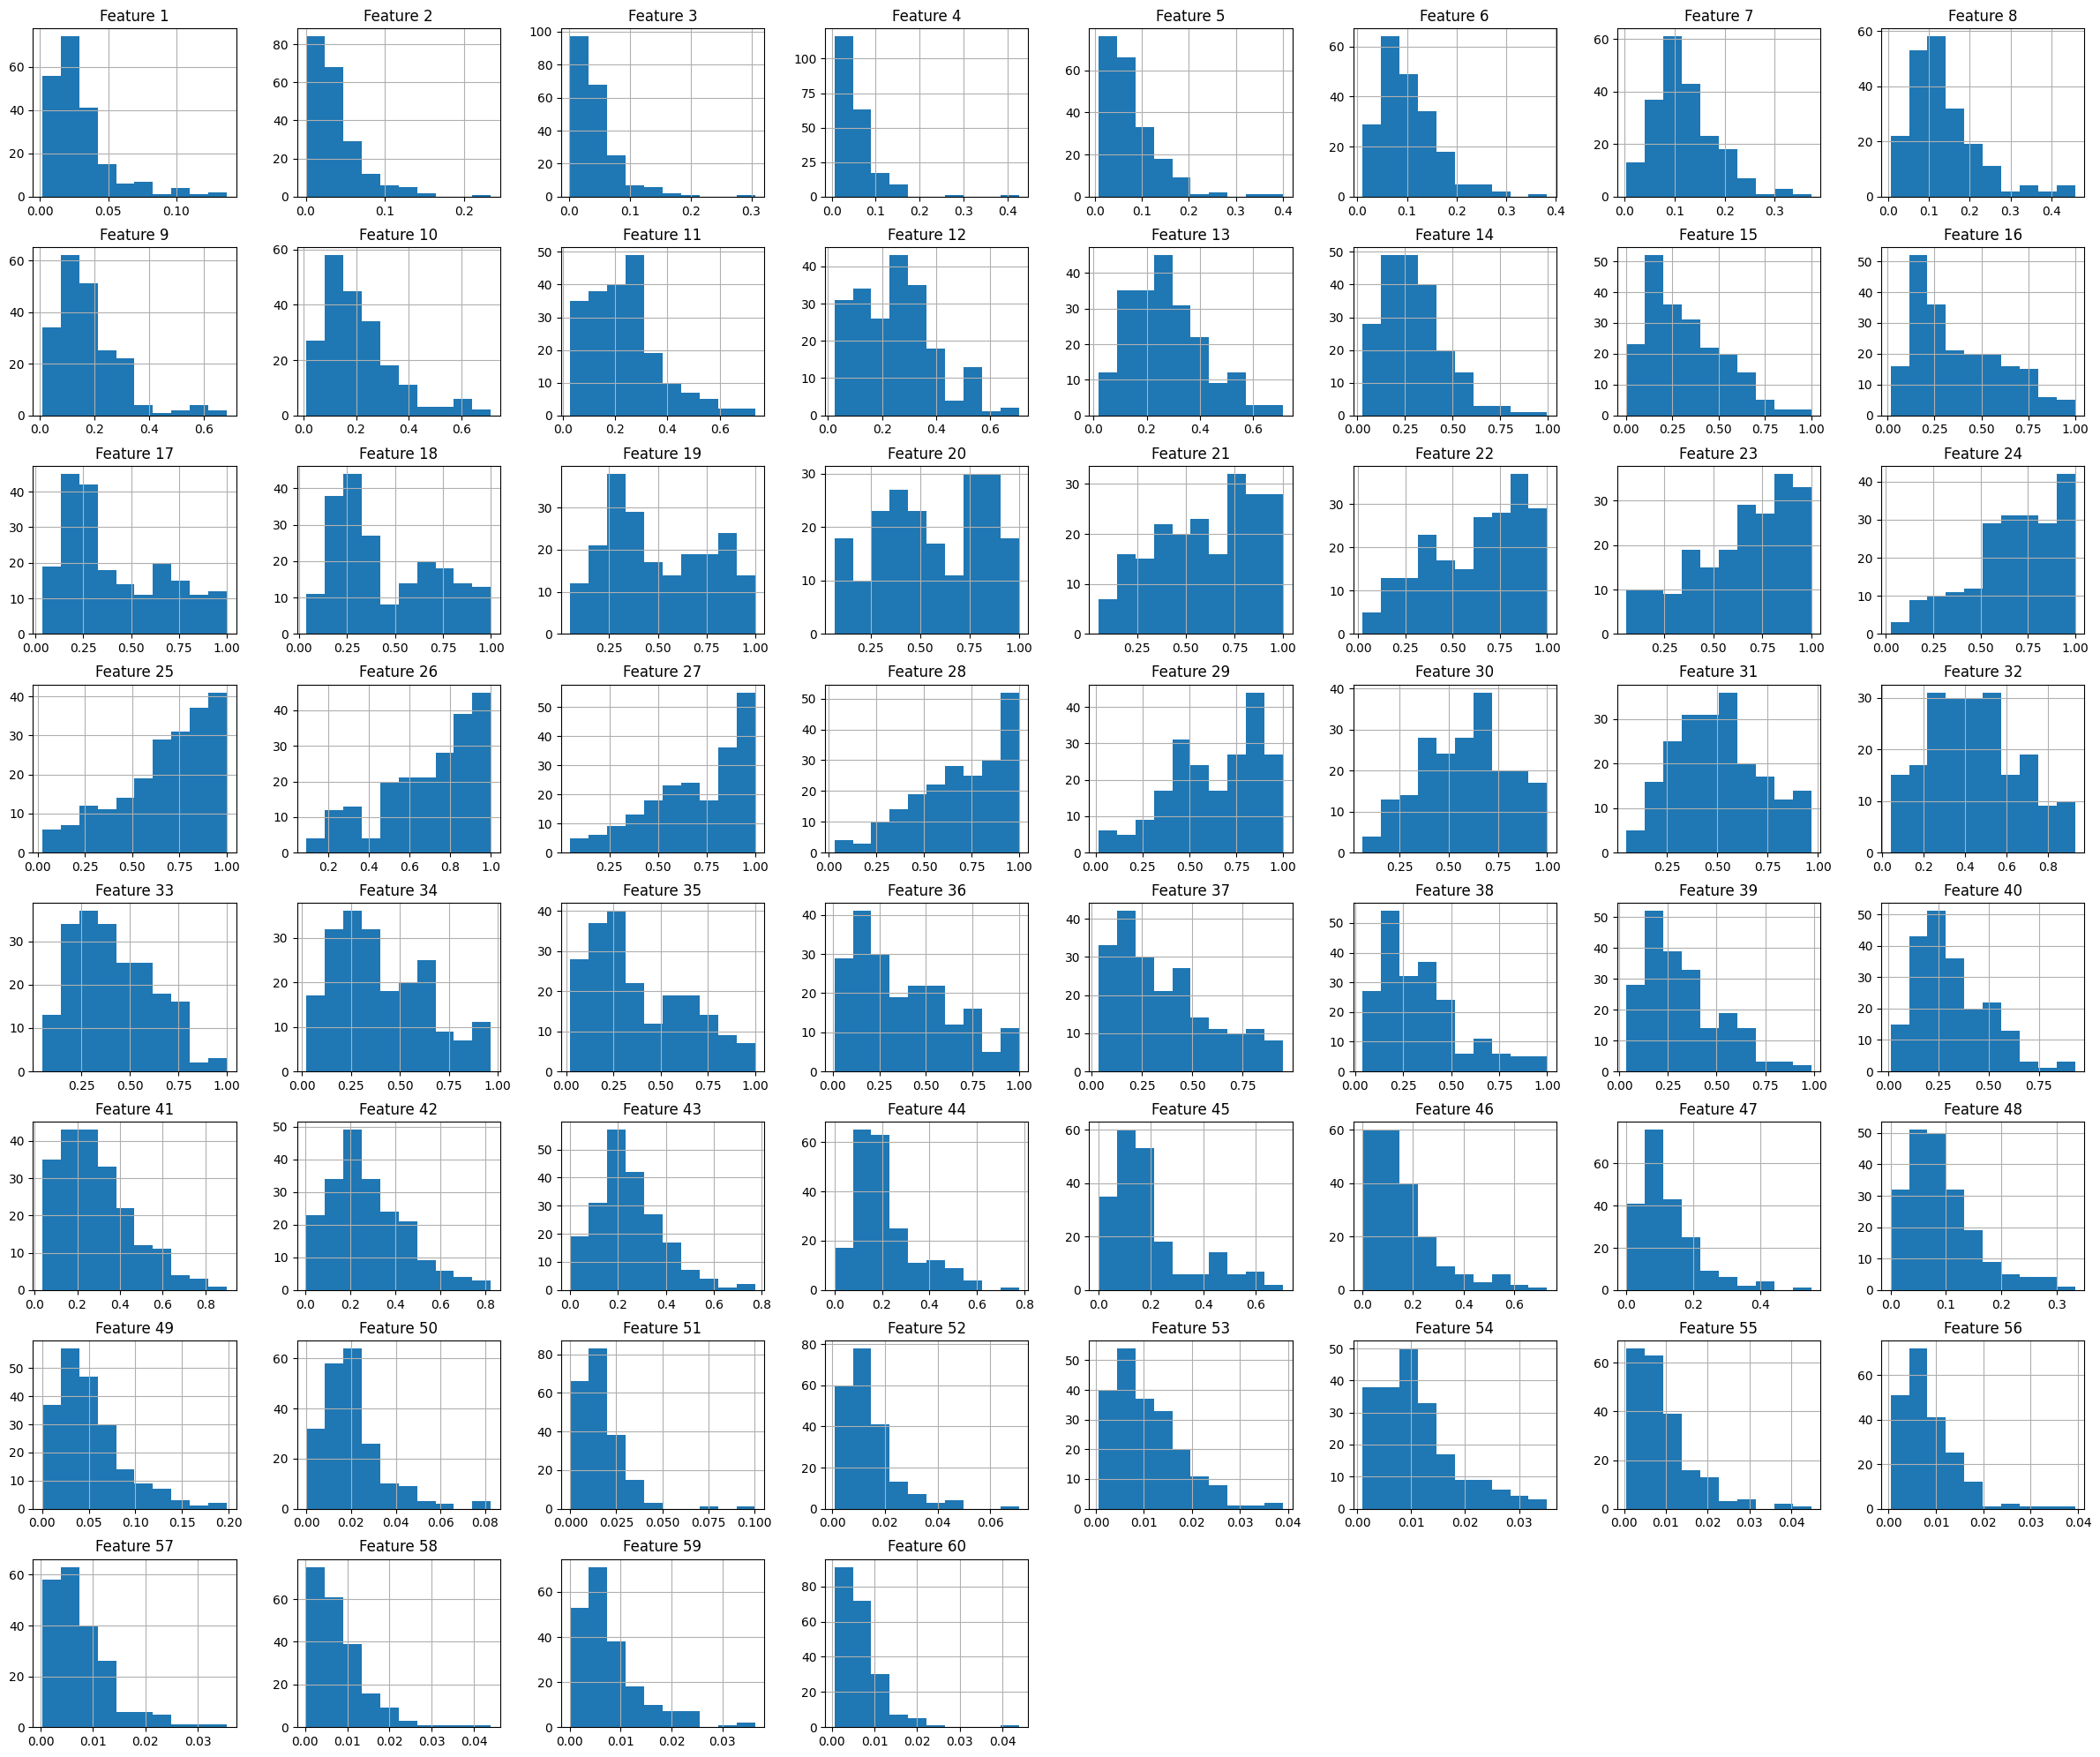

In [20]:
#%matplotlib inline tells the Jupyter environment to draw the plots immediately after the current cell. The drawn plots are shown below the code and stored in the notebook document for future reference.
%matplotlib inline
import matplotlib.pyplot as plt
#Before outliers processing technqiue
SonarData.hist(bins=10, figsize=(30,25))
plt.show()

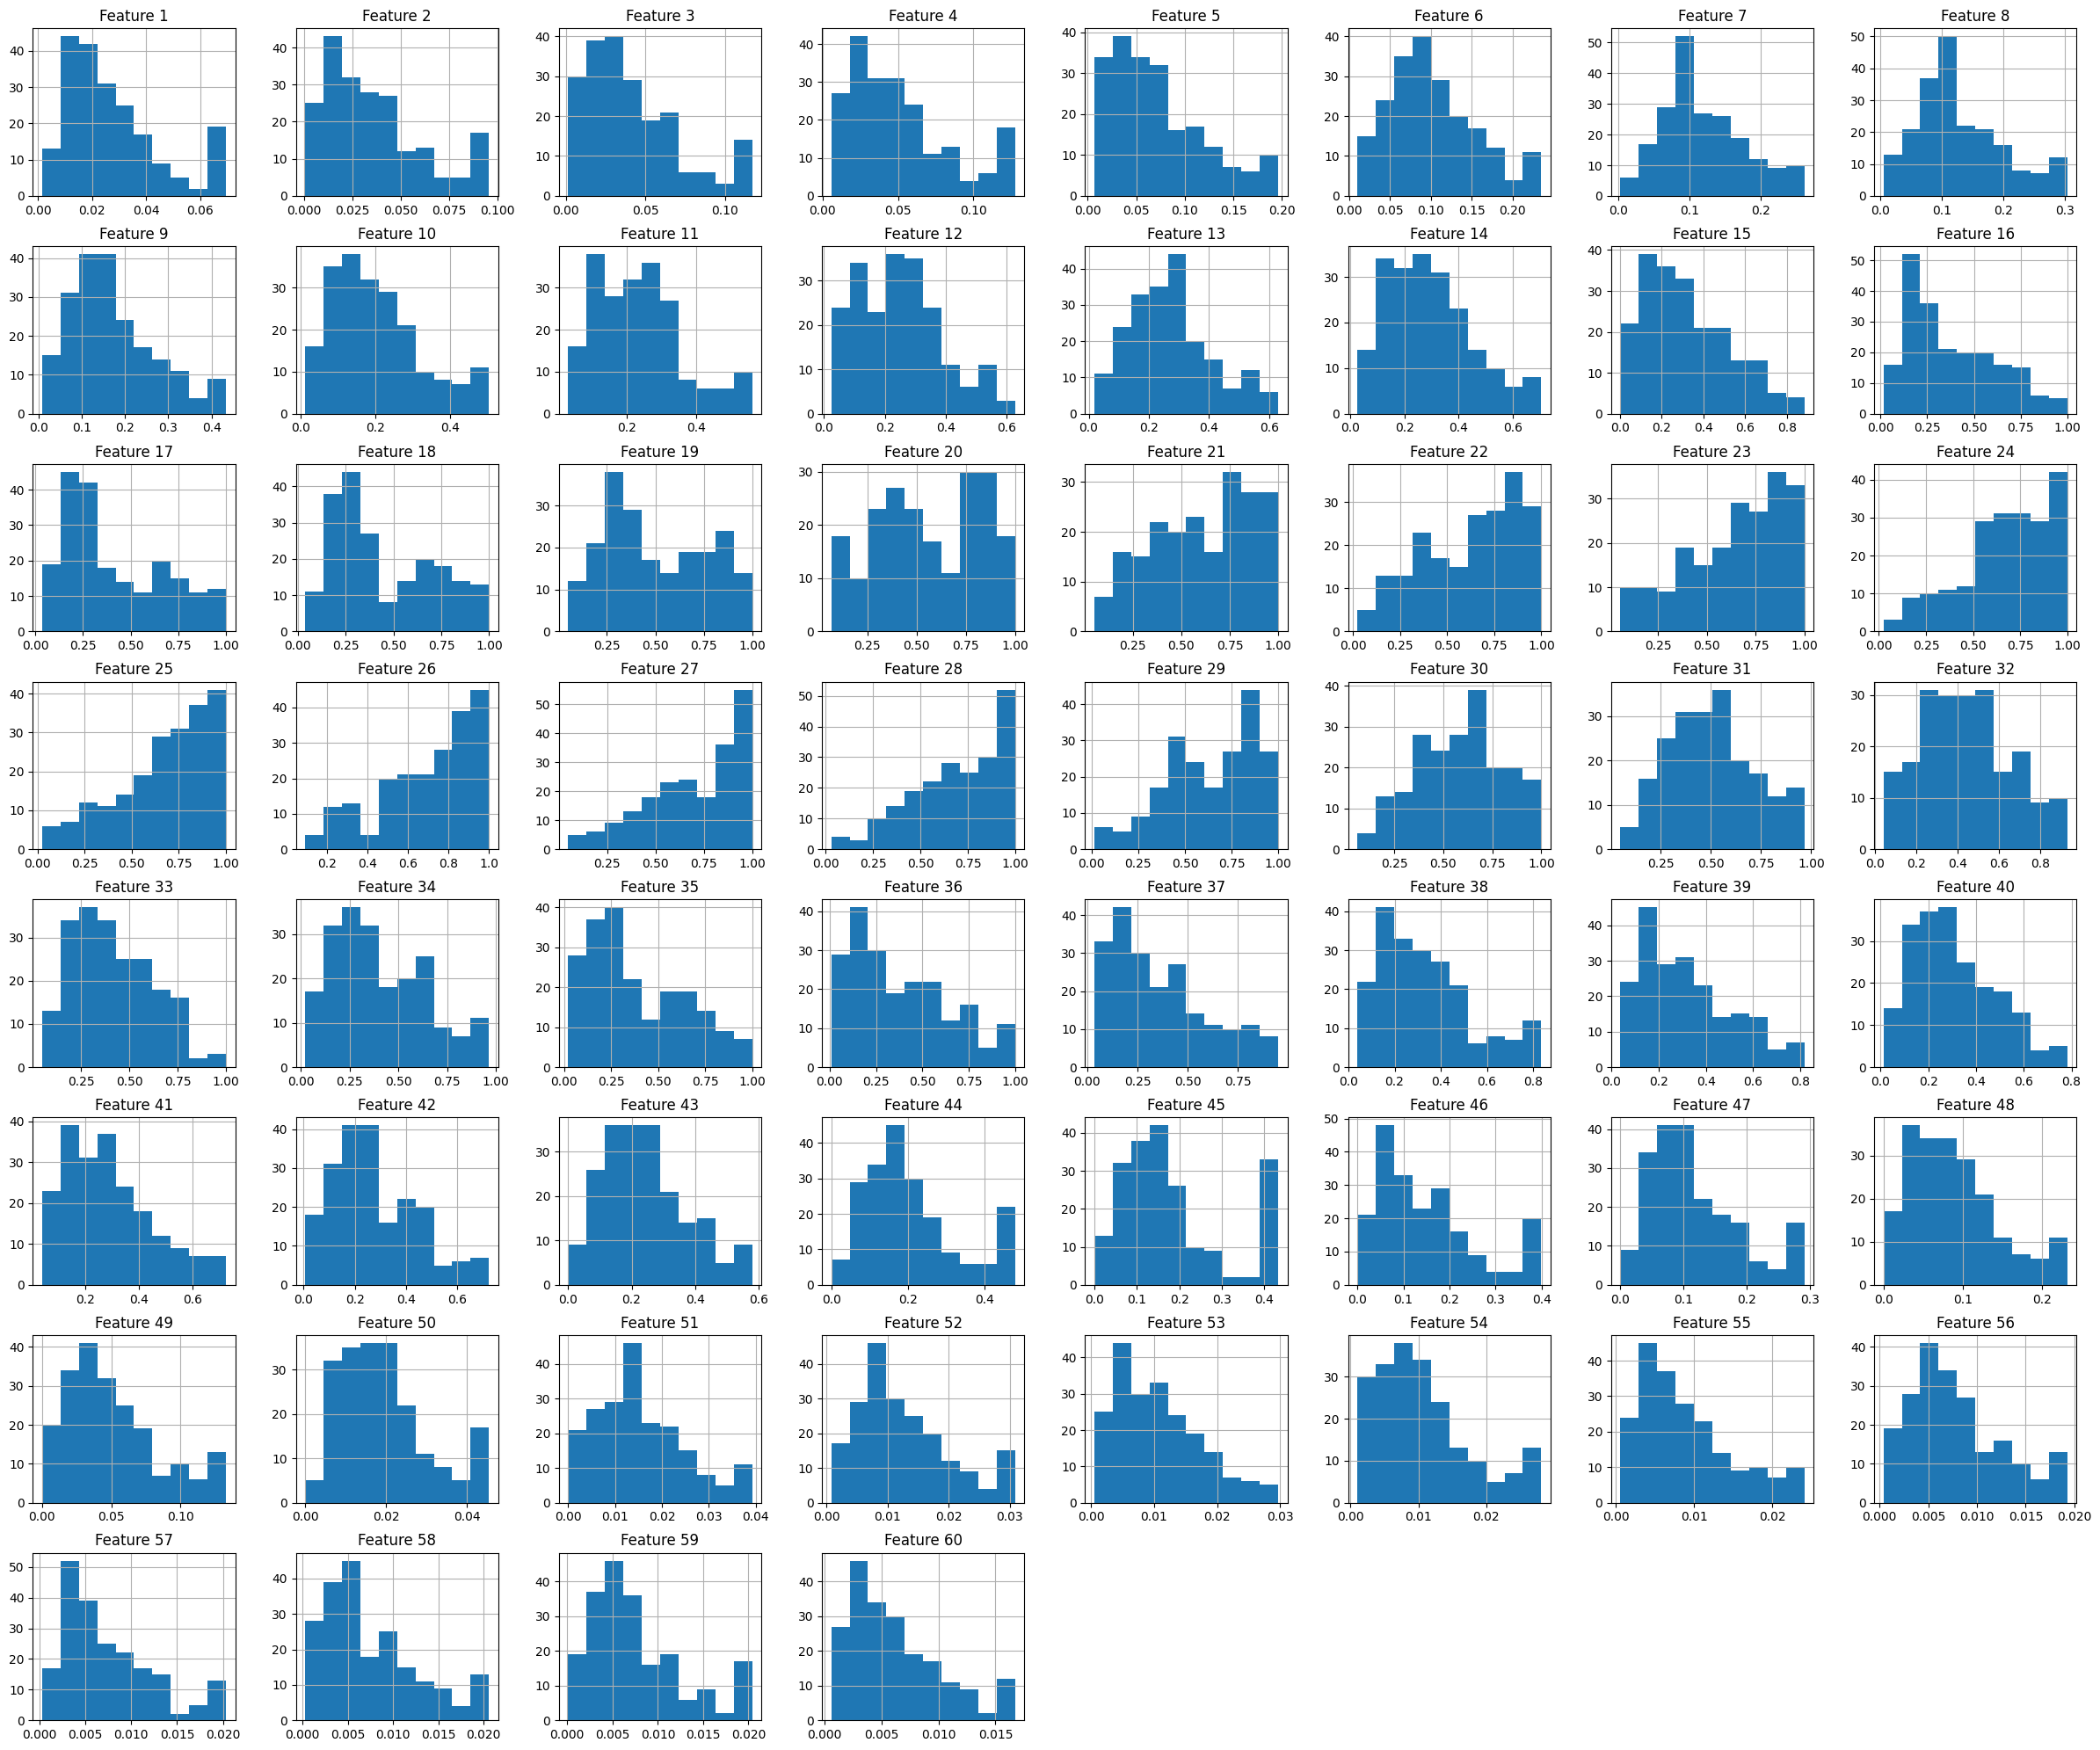

In [21]:
#After outliers processing process
ToBeProcessedSonarData.hist(bins=10, figsize=(30,25))
plt.show()

Comparison of the histogram of each feature before and after the application of the outlier removal technique shows that the distribution of some features (e.g., feature 1 and feature 60) <u>more closely resembles a normal distribution</u> as a result of this technique than the distribution in the original feature range before the outlier removal.

#### 5.3.1.6 Feature selection-based Correlation Matrix technique

In this phase, the ***correlation matrix*** between the 60 features in the input space and the attribute "Object_Class" in the output space is created to select the most correlated features for it. 

The method "Sonar Data.info()" shows that the type of the last column in the Sonar data set is ***"Objet"***, while the type of the first 60 columns is ***numeric***. Therefore, it is better to convert the type of the last column to ***numeric*** type, as in the next cell:

In [22]:
ToBeProcessedSonarData.loc[ToBeProcessedSonarData["Object_Class"] == "M", "Object_Class"] = 1
ToBeProcessedSonarData.loc[ToBeProcessedSonarData["Object_Class"] == "R", "Object_Class"] = 0
ToBeProcessedSonarData["Object_Class"]=pd.to_numeric(ToBeProcessedSonarData["Object_Class"])
ToBeProcessedSonarData

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
Sample 1      0.04530    0.05230    0.08430   0.068900   0.118300    0.23495   
Sample 2      0.02620    0.05820    0.10990   0.108300   0.097400    0.22800   
Sample 3      0.01000    0.01710    0.06230   0.020500   0.020500    0.03680   
Sample 4      0.06955    0.06660    0.04810   0.039400   0.059000    0.06490   
Sample 5      0.02860    0.04530    0.02770   0.017400   0.038400    0.09900   
Sample 6      0.03170    0.09560    0.11715   0.127575   0.167400    0.17100   
Sample 7      0.05190    0.05480    0.08420   0.031900   0.115800    0.09220   
Sample 8      0.02230    0.03750    0.04840   0.047500   0.064700    0.05910   
Sample 9      0.01640    0.01730    0.03470   0.007000   0.018700    0.06710   
Sample 10     0.00390    0.00630    0.01520   0.033600   0.031000    0.02840   
Sample 11     0.01230    0.03090    0.01690   0.031300   0.035800    0.01020   
Sample 12     0.00790    0.00860    0.00550   0.025000   0.034400    0.05460   
Sample 13     0.00900    0.00620    0.02530   0.048900   0.119700    0.15890   
Sample 14     0.01240    0.04330    0.06040   0.044900   0.059700    0.03550   
Sample 15     0.02980    0.06150    0.06500   0.092100   0.161500    0.22940   
Sample 16     0.03520    0.01160    0.01910   0.046900   0.073700    0.11850   
Sample 17     0.01920    0.06070    0.03780   0.077400   0.138800    0.08090   
Sample 18     0.02700    0.00920    0.01450   0.027800   0.041200    0.07570   
Sample 19     0.01260    0.01490    0.06410   0.127575   0.196075    0.23495   
Sample 20     0.04730    0.05090    0.08190   0.125200   0.178300    0.23495   
Sample 21     0.06640    0.05750    0.08420   0.037200   0.045800    0.07710   
Sample 22     0.00990    0.04840    0.02990   0.029700   0.065200    0.10770   
Sample 23     0.01150    0.01500    0.01360   0.007600   0.021100    0.10580   
Sample 24     0.02930    0.06440    0.03900   0.017300   0.047600    0.08160   
Sample 25     0.02010    0.00260    0.01380   0.006200   0.013300    0.01510   
Sample 26     0.01510    0.03200    0.05990   0.105000   0.116300    0.17340   
Sample 27     0.01770    0.03000    0.02880   0.039400   0.063000    0.05260   
Sample 28     0.01000    0.02750    0.01900   0.037100   0.041600    0.02010   
Sample 29     0.01890    0.03080    0.01970   0.062200   0.008000    0.07890   
Sample 30     0.02400    0.02180    0.03240   0.056900   0.033000    0.05130   
Sample 31     0.00840    0.01530    0.02910   0.043200   0.095100    0.07520   
Sample 32     0.01950    0.02130    0.00580   0.019000   0.031900    0.05710   
Sample 33     0.04420    0.04770    0.00490   0.058100   0.027800    0.06780   
Sample 34     0.03110    0.04910    0.06920   0.083100   0.007900    0.02000   
Sample 35     0.02060    0.01320    0.05330   0.056900   0.064700    0.14320   
Sample 36     0.00940    0.01660    0.03980   0.035900   0.068100    0.07060   
Sample 37     0.03330    0.02210    0.02700   0.048100   0.067900    0.09810   
Sample 38     0.01230    0.00220    0.01960   0.020600   0.018000    0.04920   
Sample 39     0.00910    0.02130    0.02060   0.050500   0.065700    0.07950   
Sample 40     0.00680    0.02320    0.05130   0.044400   0.024900    0.06370   
Sample 41     0.00930    0.01850    0.00560   0.006400   0.026000    0.04580   
Sample 42     0.02110    0.03190    0.04150   0.028600   0.012100    0.04380   
Sample 43     0.00930    0.02690    0.02170   0.033900   0.030500    0.11720   
Sample 44     0.02570    0.04470    0.03880   0.023900   0.131500    0.13230   
Sample 45     0.04080    0.06530    0.03970   0.060400   0.049600    0.18170   
Sample 46     0.03080    0.03390    0.02020   0.088900   0.157000    0.17500   
Sample 47     0.03730    0.02810    0.02320   0.022500   0.017900    0.07330   
Sample 48     0.01900    0.00380    0.06420   0.045200   0.033300    0.06900   
Sample 49     0.01190    0.05820    0.06230   0.060000   0.139700    0.18830   
Sample 50   

In [23]:
ToBeProcessedSonarData["Object_Class"].value_counts()

1    111
0     96
Name: Object_Class, dtype: int64

From the output of the last cell it can be seen that the type of the "Object Class" has been converted into the `integer` type.

The standard correlation coefficient between the "Object_Class" attribute and other attributs, namely ***Correlation Matrix*** of this dataset can be determined with the method "pandas.DataFrame.corr"(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) as follows:

In [24]:
CorrMat=ToBeProcessedSonarData.corr()
CorValue=CorrMat["Object_Class"].sort_values(ascending=False)
Correlatedfeatures=CorValue.iloc[1:60]
CorrelatedfeaturesDataframe=Correlatedfeatures.to_frame()
CorrelatedfeaturesDataframe

Object_Class
Feature 11      0.444335
Feature 12      0.398376
Feature 49      0.373625
Feature 10      0.359505
Feature 9       0.353260
Feature 48      0.345309
Feature 45      0.342873
Feature 51      0.322899
Feature 47      0.321916
Feature 46      0.316402
Feature 13      0.316191
Feature 44      0.303006
Feature 52      0.300656
Feature 4       0.275473
Feature 1       0.274481
Feature 43      0.250344
Feature 21      0.242818
Feature 2       0.239695
Feature 5       0.232763
Feature 20      0.223143
Feature 8       0.206453
Feature 50      0.205431
Feature 22      0.199643
Feature 3       0.194936
Feature 54      0.179530
Feature 58      0.167381
Feature 6       0.166929
Feature 14      0.155159
Feature 42      0.145035
Feature 19      0.138648
Feature 7       0.134423
Feature 53      0.133298
Feature 59      0.130704
Feature 56      0.124510
Feature 23      0.123539
Feature 28      0.085259
Feature 39      0.074395
Feature 24      0.071733
Feature 55      0.060843
Feature 60      0.057576
Feature 27      0.055324
Feature 15      0.054103
Feature 29      0.037543
Feature 26      0.026867
Feature 25      0.025284
Feature 41      0.020151
Feature 57      0.012181
Feature 18      0.011635
Feature 16      0.008246
Feature 30     -0.000364
Feature 17     -0.006070
Feature 40     -0.027275
Feature 38     -0.035484
Feature 32     -0.059882
Feature 33     -0.105149
Feature 31     -0.121008
Feature 34     -0.165523
Feature 37     -0.203826
Feature 35     -0.220761

The previous dataframe presents the ***correlation coefficient*** values between the 60 features and object class attribute.

Based on these correlation coefficient values, only the features whose <u>***correlation coefficient*** is greater than or equal to ***0.2***</u> are selected, as in the next code, to create the new data frame (<u>ToBeProcessedSonarDatawithmostimportantFeatures</u>) of the sonar dataset with ***the 22 most highly correlated features*** of the original 60 features:

In [25]:
MostImportantFeatures=CorrelatedfeaturesDataframe.drop(CorrelatedfeaturesDataframe[CorrelatedfeaturesDataframe["Object_Class"] < 0.2].index)
ToBeProcessedSonarDatawithmostimportantFeatures=ToBeProcessedSonarData[MostImportantFeatures.index]
ToBeProcessedSonarDatawithmostimportantFeatures["Object_Class"]=ToBeProcessedSonarData["Object_Class"]
ToBeProcessedSonarDatawithmostimportantFeatures

Feature 11  Feature 12  Feature 49  Feature 10  Feature 9  \
Sample 1        0.4918    0.628825    0.040900    0.287200   0.333700   
Sample 2        0.5622    0.628825    0.013000    0.505775   0.433625   
Sample 3        0.0881    0.199200    0.068100    0.126400   0.059800   
Sample 4        0.4152    0.395200    0.023000    0.445900   0.356400   
Sample 5        0.2988    0.425000    0.026400    0.303900   0.210500   
Sample 6        0.1786    0.065800    0.050700    0.351300   0.208300   
Sample 7        0.2802    0.308600    0.028500    0.283800   0.146500   
Sample 8        0.1156    0.165400    0.077700    0.148700   0.068400   
Sample 9        0.0801    0.105600    0.009200    0.025100   0.096200   
Sample 10       0.0492    0.099600    0.022800    0.045200   0.032300   
Sample 11       0.0548    0.084700    0.013400    0.083500   0.112200   
Sample 12       0.1097    0.121500    0.015200    0.124000   0.100900   
Sample 13       0.1896    0.254700    0.014600    0.189500   0.095500   
Sample 14       0.1640    0.190100    0.045000    0.212000   0.105200   
Sample 15       0.2476    0.364500    0.045200    0.085200   0.145900   
Sample 16       0.2328    0.223700    0.021600    0.291200   0.146600   
Sample 17       0.1237    0.160100    0.052000    0.118600   0.103700   
Sample 18       0.1675    0.137000    0.032500    0.152000   0.079400   
Sample 19       0.5622    0.541900    0.037200    0.505775   0.433625   
Sample 20       0.3021    0.290900    0.043600    0.375900   0.383000   
Sample 21       0.2869    0.412900    0.057800    0.183800   0.235300   
Sample 22       0.1456    0.189200    0.132925    0.188200   0.007500   
Sample 23       0.0740    0.062200    0.070400    0.073400   0.093100   
Sample 24       0.0414    0.047200    0.056700    0.086000   0.073600   
Sample 25       0.0841    0.094200    0.033700    0.109700   0.050500   
Sample 26       0.0847    0.151800    0.021900    0.120500   0.088900   
Sample 27       0.1680    0.347600    0.035600    0.061300   0.062400   
Sample 28       0.3376    0.328200    0.058900    0.266800   0.189600   
Sample 29       0.2607    0.371000    0.010800    0.252200   0.178900   
Sample 30       0.1934    0.243400    0.014400    0.038900   0.056900   
Sample 31       0.1970    0.116700    0.010600    0.175300   0.069200   
Sample 32       0.0728    0.063900    0.034300    0.024200   0.069100   
Sample 33       0.1109    0.237500    0.071900    0.126800   0.097400   
Sample 34       0.1767    0.255500    0.059200    0.076700   0.202500   
Sample 35       0.2327    0.178500    0.022100    0.157300   0.157100   
Sample 36       0.1303    0.027300    0.017400    0.132800   0.038100   
Sample 37       0.1475    0.052200    0.002100    0.092000   0.075900   
Sample 38       0.1152    0.052000    0.027200    0.047500   0.079100   
Sample 39       0.1579    0.089800    0.036700    0.083700   0.074300   
Sample 40       0.1606    0.092200    0.009300    0.247500   0.191100   
Sample 41       0.0888    0.159900    0.008500    0.064000   0.042500   
Sample 42       0.0869    0.193500    0.017100    0.056800   0.069500   
Sample 43       0.2132    0.373800    0.017600    0.136000   0.074000   
Sample 44       0.0891    0.086100    0.095600    0.056100   0.084700   
Sample 45       0.2459    0.333200    0.047500    0.217600   0.058300   
Sample 46       0.3336    0.294000    0.042200    0.279500   0.159300   
Sample 47       0.1564    0.256500    0.031700    0.080200   0.099300   
Sample 48       0.1459    0.347300    0.032500    0.034900   0.074000   
Sample 49       0.2143    0.372000    0.030400    0.086400   0.048700   
Sample 50       0.1078    0.097900    0.055900    0.088000   0.029800   
Sample 51       0.0750    0.084400    0.010800    0.090100   0.072600   
Sample 52       0.1315    0.186200    0.015900    0.081800   0.057600   
Sample 53       0.0528    0.120900    0.039700    0.075100   0.097300   
Sample 54       0.1445    0.147500    0.032500    0.092200   0.089900 

According to the proposed selection technique, the considered sonar dataset will be "ToBeProcessedSonarDatawithmostimportantFeatures", ***which is the input for the proposed machine learning system for mine and rock prediction***, and the related information can be found in the next cell:

In [26]:
ToBeProcessedSonarDatawithmostimportantFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Sample 1 to Sample 207
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature 11    207 non-null    float64
 1   Feature 12    207 non-null    float64
 2   Feature 49    207 non-null    float64
 3   Feature 10    207 non-null    float64
 4   Feature 9     207 non-null    float64
 5   Feature 48    207 non-null    float64
 6   Feature 45    207 non-null    float64
 7   Feature 51    207 non-null    float64
 8   Feature 47    207 non-null    float64
 9   Feature 46    207 non-null    float64
 10  Feature 13    207 non-null    float64
 11  Feature 44    207 non-null    float64
 12  Feature 52    207 non-null    float64
 13  Feature 4     207 non-null    float64
 14  Feature 1     207 non-null    float64
 15  Feature 43    207 non-null    float64
 16  Feature 21    207 non-null    float64
 17  Feature 2     207 non-null    float64
 18  Feature 5     207 non

The most important process now is to distinguish between the attributes of the input space, i.e. 22 features, and the attributes of the output space, i.e. the "Object_Class" attribute, as in the code of the next cell:

In [27]:
FeaturesOfProcessedSonarData=ToBeProcessedSonarDatawithmostimportantFeatures.drop("Object_Class",axis=1)
FeaturesOfProcessedSonarData

Feature 11  Feature 12  Feature 49  Feature 10  Feature 9  \
Sample 1        0.4918    0.628825    0.040900    0.287200   0.333700   
Sample 2        0.5622    0.628825    0.013000    0.505775   0.433625   
Sample 3        0.0881    0.199200    0.068100    0.126400   0.059800   
Sample 4        0.4152    0.395200    0.023000    0.445900   0.356400   
Sample 5        0.2988    0.425000    0.026400    0.303900   0.210500   
Sample 6        0.1786    0.065800    0.050700    0.351300   0.208300   
Sample 7        0.2802    0.308600    0.028500    0.283800   0.146500   
Sample 8        0.1156    0.165400    0.077700    0.148700   0.068400   
Sample 9        0.0801    0.105600    0.009200    0.025100   0.096200   
Sample 10       0.0492    0.099600    0.022800    0.045200   0.032300   
Sample 11       0.0548    0.084700    0.013400    0.083500   0.112200   
Sample 12       0.1097    0.121500    0.015200    0.124000   0.100900   
Sample 13       0.1896    0.254700    0.014600    0.189500   0.095500   
Sample 14       0.1640    0.190100    0.045000    0.212000   0.105200   
Sample 15       0.2476    0.364500    0.045200    0.085200   0.145900   
Sample 16       0.2328    0.223700    0.021600    0.291200   0.146600   
Sample 17       0.1237    0.160100    0.052000    0.118600   0.103700   
Sample 18       0.1675    0.137000    0.032500    0.152000   0.079400   
Sample 19       0.5622    0.541900    0.037200    0.505775   0.433625   
Sample 20       0.3021    0.290900    0.043600    0.375900   0.383000   
Sample 21       0.2869    0.412900    0.057800    0.183800   0.235300   
Sample 22       0.1456    0.189200    0.132925    0.188200   0.007500   
Sample 23       0.0740    0.062200    0.070400    0.073400   0.093100   
Sample 24       0.0414    0.047200    0.056700    0.086000   0.073600   
Sample 25       0.0841    0.094200    0.033700    0.109700   0.050500   
Sample 26       0.0847    0.151800    0.021900    0.120500   0.088900   
Sample 27       0.1680    0.347600    0.035600    0.061300   0.062400   
Sample 28       0.3376    0.328200    0.058900    0.266800   0.189600   
Sample 29       0.2607    0.371000    0.010800    0.252200   0.178900   
Sample 30       0.1934    0.243400    0.014400    0.038900   0.056900   
Sample 31       0.1970    0.116700    0.010600    0.175300   0.069200   
Sample 32       0.0728    0.063900    0.034300    0.024200   0.069100   
Sample 33       0.1109    0.237500    0.071900    0.126800   0.097400   
Sample 34       0.1767    0.255500    0.059200    0.076700   0.202500   
Sample 35       0.2327    0.178500    0.022100    0.157300   0.157100   
Sample 36       0.1303    0.027300    0.017400    0.132800   0.038100   
Sample 37       0.1475    0.052200    0.002100    0.092000   0.075900   
Sample 38       0.1152    0.052000    0.027200    0.047500   0.079100   
Sample 39       0.1579    0.089800    0.036700    0.083700   0.074300   
Sample 40       0.1606    0.092200    0.009300    0.247500   0.191100   
Sample 41       0.0888    0.159900    0.008500    0.064000   0.042500   
Sample 42       0.0869    0.193500    0.017100    0.056800   0.069500   
Sample 43       0.2132    0.373800    0.017600    0.136000   0.074000   
Sample 44       0.0891    0.086100    0.095600    0.056100   0.084700   
Sample 45       0.2459    0.333200    0.047500    0.217600   0.058300   
Sample 46       0.3336    0.294000    0.042200    0.279500   0.159300   
Sample 47       0.1564    0.256500    0.031700    0.080200   0.099300   
Sample 48       0.1459    0.347300    0.032500    0.034900   0.074000   
Sample 49       0.2143    0.372000    0.030400    0.086400   0.048700   
Sample 50       0.1078    0.097900    0.055900    0.088000   0.029800   
Sample 51       0.0750    0.084400    0.010800    0.090100   0.072600   
Sample 52       0.1315    0.186200    0.015900    0.081800   0.057600   
Sample 53       0.0528    0.120900    0.039700    0.075100   0.097300   
Sample 54       0.1445    0.147500    0.032500    0.092200   0.089900 

In [28]:
TargetsOfProcessedSonarData=ToBeProcessedSonarDatawithmostimportantFeatures["Object_Class"]
TargetsOfProcessedSonarData

Sample 1      0
Sample 2      0
Sample 3      0
Sample 4      0
Sample 5      0
Sample 6      0
Sample 7      0
Sample 8      0
Sample 9      0
Sample 10     0
Sample 11     0
Sample 12     0
Sample 13     0
Sample 14     0
Sample 15     0
Sample 16     0
Sample 17     0
Sample 18     0
Sample 19     0
Sample 20     0
Sample 21     0
Sample 22     0
Sample 23     0
Sample 24     0
Sample 25     0
Sample 26     0
Sample 27     0
Sample 28     0
Sample 29     0
Sample 30     0
Sample 31     0
Sample 32     0
Sample 33     0
Sample 34     0
Sample 35     0
Sample 36     0
Sample 37     0
Sample 38     0
Sample 39     0
Sample 40     0
Sample 41     0
Sample 42     0
Sample 43     0
Sample 44     0
Sample 45     0
Sample 46     0
Sample 47     0
Sample 48     0
Sample 49     0
Sample 50     0
Sample 51     0
Sample 52     0
Sample 53     0
Sample 54     0
Sample 55     0
Sample 56     0
Sample 57     0
Sample 58     0
Sample 59     0
Sample 60     0
Sample 61     0
Sample 62     0
Sample 6

### 5.4 Machine Learning Modeling

#### 5.4.1 Determination of the Machine Learning System

The proposed project uses human supervision/intervention to create the *solution* to the "Mine-Rock-Distinguishing" problem with the <u>complete labeling</u> of the dataset to train/learn the desired machine learning system; therefore, this system is ***supervised***. Since the available labeled dataset is limited and not used incrementally during the training phase, the learning of this system is ***Batch/offline***. In this system, the ***Model*** is to be created for mapping/realizing the Input-Output/Feartures-Tragets space; therefore, the type of this system is ***Model-based learning***.\
<u>The type of the designed machine learning system is supervised, batch/offline, and model-based learning.</u>

#### 5.4.2 Creation of Training, Validation and Testing Datasets

Before splitting the "ProcessedSonarDatase" dataset into training, validation and testing sub-datasets, it is better to find and handle the missing values that could be generated after the previous data preparation step. For this purpose, the "SimpleImputer" estimator of SciKit-Learn can be used to account for the missing values
(see: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) as shown in the code of the next cells:

In [29]:
#Importing the required Packages and modules
from sklearn.impute import SimpleImputer
#Tracking and to handling the missing values
Missinghandling=SimpleImputer(strategy="mean")
ProcessedSonarDataset=Missinghandling.fit_transform(FeaturesOfProcessedSonarData)
pd.DataFrame(ProcessedSonarDataset)

0         1         2         3         4         5       6   \
0    0.4918  0.628825  0.040900  0.287200  0.333700  0.074200  0.0621   
1    0.5622  0.628825  0.013000  0.505775  0.433625  0.074400  0.2111   
2    0.0881  0.199200  0.068100  0.126400  0.059800  0.157600  0.4295   
3    0.4152  0.395200  0.023000  0.445900  0.356400  0.008500  0.0692   
4    0.2988  0.425000  0.026400  0.303900  0.210500  0.049400  0.1192   
5    0.1786  0.065800  0.050700  0.351300  0.208300  0.104700  0.1304   
6    0.2802  0.308600  0.028500  0.283800  0.146500  0.025400  0.2146   
7    0.1156  0.165400  0.077700  0.148700  0.068400  0.116400  0.0985   
8    0.0801  0.105600  0.009200  0.025100  0.096200  0.051300  0.0372   
9    0.0492  0.099600  0.022800  0.045200  0.032300  0.053400  0.1533   
10   0.0548  0.084700  0.013400  0.083500  0.112200  0.044500  0.0894   
11   0.1097  0.121500  0.015200  0.124000  0.100900  0.069200  0.0678   
12   0.1896  0.254700  0.014600  0.189500  0.095500  0.053800  0.1937   
13   0.1640  0.190100  0.045000  0.212000  0.105200  0.031800  0.1155   
14   0.2476  0.364500  0.045200  0.085200  0.145900  0.074800  0.1553   
15   0.2328  0.223700  0.021600  0.291200  0.146600  0.068900  0.2378   
16   0.1237  0.160100  0.052000  0.118600  0.103700  0.082900  0.1260   
17   0.1675  0.137000  0.032500  0.152000  0.079400  0.047200  0.1353   
18   0.5622  0.541900  0.037200  0.505775  0.433625  0.027800  0.1136   
19   0.3021  0.290900  0.043600  0.375900  0.383000  0.020900  0.1903   
20   0.2869  0.412900  0.057800  0.183800  0.235300  0.119800  0.1492   
21   0.1456  0.189200  0.132925  0.188200  0.007500  0.231825  0.4327   
22   0.0740  0.062200  0.070400  0.073400  0.093100  0.119500  0.2341   
23   0.0414  0.047200  0.056700  0.086000  0.073600  0.113300  0.1582   
24   0.0841  0.094200  0.033700  0.109700  0.050500  0.045300  0.2748   
25   0.0847  0.151800  0.021900  0.120500  0.088900  0.047600  0.1556   
26   0.1680  0.347600  0.035600  0.061300  0.062400  0.039200  0.1107   
27   0.3376  0.328200  0.058900  0.266800  0.189600  0.084300  0.1380   
28   0.2607  0.371000  0.010800  0.252200  0.178900  0.040400  0.1008   
29   0.1934  0.243400  0.014400  0.038900  0.056900  0.063400  0.1418   
30   0.1970  0.116700  0.010600  0.175300  0.069200  0.040700  0.0986   
31   0.0728  0.063900  0.034300  0.024200  0.069100  0.061700  0.1315   
32   0.1109  0.237500  0.071900  0.126800  0.097400  0.041600  0.0944   
33   0.1767  0.255500  0.059200  0.076700  0.202500  0.084500  0.0615   
34   0.2327  0.178500  0.022100  0.157300  0.157100  0.023100  0.0787   
35   0.1303  0.027300  0.017400  0.132800  0.038100  0.042200  0.1163   
36   0.1475  0.052200  0.002100  0.092000  0.075900  0.045600  0.0575   
37   0.1152  0.052000  0.027200  0.047500  0.079100  0.030100  0.0656   
38   0.1579  0.089800  0.036700  0.083700  0.074300  0.074800  0.0758   
39   0.1606  0.092200  0.009300  0.247500  0.191100  0.042000  0.0194   
40   0.0888  0.159900  0.008500  0.064000  0.042500  0.015200  0.1144   
41   0.0869  0.193500  0.017100  0.056800  0.069500  0.030000  0.2391   
42   0.2132  0.373800  0.017600  0.136000  0.074000  0.069300  0.1578   
43   0.0891  0.086100  0.095600  0.056100  0.084700  0.185900  0.4327   
44   0.2459  0.333200  0.047500  0.217600  0.058300  0.041800  0.1651   
45   0.3336  0.294000  0.042200  0.279500  0.159300  0.068800  0.1374   
46   0.1564  0.256500  0.031700  0.080200  0.099300  0.098800  0.3212   
47   0.1459  0.347300  0.032500  0.034900  0.074000  0.078900  0.1586   
48   0.2143  0.372000  0.030400  0.086400  0.048700  0.075500  0.1708   
49   0.1078  0.097900  0.055900  0.088000  0.029800  0.107800  0.3017   
50   0.0750  0.084400  0.010800  0.090100  0.072600  0.010700  0.0095   
51   0.1315  0.186200  0.015900  0.081800  0.057600  0.048000  0.0908   
52   0.0528  0.120900  0.039700  0.075100  0.097300  0.091900  0.1473   
53   0.1445  0.147500  0.032500  0.092200  0.089900  0.071600  0.14

Now the <u>sonar dataset</u> named ***"ProcessedSonarDataset"*** is ready for machine learning modeling. For machine learning modeling, the training and test datasets are needed first; then a validation dataset is split off from the training dataset.\
To do this, using SciKit-Learn, the following techniques are used:
1. train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)
2. cross-validation (https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators).

In [30]:
#Importing the required Packages and modules
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ProcessedSonarDataset, TargetsOfProcessedSonarData, test_size=0.33, random_state=42)

In [31]:
X_train

array([[0.2607, 0.371 , 0.0108, ..., 0.2631, 0.1451, 0.0143],
       [0.2132, 0.3738, 0.0176, ..., 0.4395, 0.0638, 0.0205],
       [0.2709, 0.3358, 0.0309, ..., 0.9418, 0.1188, 0.024 ],
       ...,
       [0.2693, 0.3259, 0.0163, ..., 0.4235, 0.1741, 0.0088],
       [0.5222, 0.5611, 0.0783, ..., 0.6898, 0.1702, 0.0089],
       [0.2969, 0.4754, 0.0187, ..., 0.9032, 0.1388, 0.0077]])

In [32]:
X_train.shape, y_train.shape

((138, 22), (138,))

In [33]:
X_test

array([[0.2343, 0.2087, 0.0769, ..., 0.4161, 0.0862, 0.0222],
       [0.2328, 0.2237, 0.0216, ..., 0.4128, 0.1541, 0.0455],
       [0.0972, 0.0501, 0.0182, ..., 0.8129, 0.0664, 0.0108],
       ...,
       [0.0728, 0.0639, 0.0343, ..., 1.    , 0.0668, 0.037 ],
       [0.1896, 0.2547, 0.0146, ..., 0.3907, 0.0987, 0.0068],
       [0.1303, 0.0273, 0.0174, ..., 0.3918, 0.0893, 0.0172]])

In [34]:
X_test.shape, y_test.shape

((69, 22), (69,))

#### 5.4.3 Selection, Training and Evaluation of ML Algorithm

This step/phase aims at selecting the best ML algorithm among all possibilities, be it an individual algorithm (such as KNN, SVM, decision tree, etc.) or an ensemble algorithm (boosting, bagging or stacking) to build the ML model. This selection is generally based on the evaluation matrices (such as Recall, Precision, Accuracy, etc.), which strongly depend on the intended goals of the ML project; for example, in the mine and rock prediction project, a more reliable and dependable prediction is required; therefore, the selection criterion is ***"the best ML algorithm is the one that can achieve the best level of <u>Precision-Recall Tradeoff</u> or the best value of <u>F1 Score</u>"***. Moreover, each possible ML algorithm has specific parameters and Hyperparameters to achieve the desired machine learning task; the learning and adaptation processes of these parameters should be performed in this step/phase. The learning process of the parameters is performed using the training partial dataset and the related refinement process of these parameters can be realized using the validation partial dataset, which is a subset of the training partial dataset.  The fitting process of the Hyperparameters can be performed by the manual selection process of the desired and possible values of these parameters and then these values are fed to the learning process of the ML algorithm.
The process of selecting the best ML algorithm and the associated learning and fitting can be performed in the Scikit-Learn Library using ***sklearn.model_selection.GridSearchCV*** (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

For more information on the machine learning in the Scikit-Learn library, see https://scikit-learn.org/stable/tutorial/basic/tutorial.html

This step/phase can be performed as in this code:

In [ ]:
#Importing the required Packages and modules
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

#Initialization of each suggested estimator (classifier) object 
Estimators = []
Estimators.append(('LR', LogisticRegression()))
Estimators.append(('LDA', LinearDiscriminantAnalysis()))
Estimators.append(('KNN', KNeighborsClassifier()))
Estimators.append(('CART', DecisionTreeClassifier()))
Estimators.append(('NB', GaussianNB()))
Estimators.append(('SVM',  SVC()))
Estimators.append(('RandomForest',  RandomForestClassifier()))
Estimators.append(('AdaBoost',  AdaBoostClassifier()))
Estimators.append(('MLP',  MLPClassifier()))
Estimators.append(('QDA',  QuadraticDiscriminantAnalysis()))
Estimators.append(('GPC',  GaussianProcessClassifier()))
#Initialization of the range of the Hyperparameters of each considered estimator` (classifier)s object 
Parameters = [
    [{
        'C': (0.001,0.01,0.1,1,10,100)
    }], 
    [{
        'solver': ["svd", "lsqr", "eigen"],
        'shrinkage': ["auto", 0.1, 0.3, 0.5, 0.7]
    }],
    [{
        'n_neighbors': [2, 3, 5, 7, 9]
    }],
    [{
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ["best", "random"],
        'max_depth': [5, 7, 9, 11],
        'max_features': ["auto", "sqrt", "log2", 2, 3, 5, 7, 9, 10]
    }],
    [{
        'priors': [None],
        'var_smoothing': [1e-09],
    }],
    [{
        'C': [0.001, 0.01, 0.1, 1],
        'kernel': ["linear", "poly", "sigmoid", "precomuted"],
        'degree': [2, 3, 5, 6, 7],
        'gamma': ["scale", "auto", 0.001, 0.01, 0.1, 1]
        
    }],
    [{
        'n_estimators': [10, 20, 30],
        'max_depth': [5,7,9,11],
        'max_features': ["auto","sqrt","log2",None]
    }],
    [{
        'n_estimators': [10, 15, 20, 25, 30],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'algorithm': ["SAMME", "SAMME.R"]
        
    }],
    [{
        'activation': ["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        'batch_size': [50, 75, 100, 125, 150, 175, 207],
        'learning_rate': ["constant", "invscaling", "adaptive"]
    }],
    [{
        'priors': [None],
        'reg_param': [0.0, 0.1],
    }],
    [{
        'optimizer': ["fmin_l_bfgs_b"]
    }]
]
Compared_Ev_Matrics = np.zeros([120, 4])
Compared_SKLearn_Models = []
Number_Of_Model = 0
for IKFS in range(2,23):
    X_Moleding_Training = X_train[:, :IKFS]
    X_Moleding_Testing = X_test[:, :IKFS]
    for IModle, IParameters in zip (Estimators, Parameters):
        print(IKFS)
        clf = GridSearchCV(IModle[1], IParameters, scoring="recall", cv=10)
        clf.fit(X_Moleding_Training, y_train)
        y_pred = clf.predict(X_Moleding_Testing)
        Recall_Ev_Mat = recall_score(y_test, y_pred)
        Precision_Ev_Mat = precision_score(y_test, y_pred)
        F1_Ev_Mat = f1_score(y_test, y_pred)
        if Recall_Ev_Mat >= 0.80 and Precision_Ev_Mat >= 0.80 and F1_Ev_Mat >= 0.80:
            Compared_Ev_Matrics[Number_Of_Model, 0] = IKFS #number of features used in the tarining and evalution of the considered model
            Compared_Ev_Matrics[Number_Of_Model, 1] = Recall_Ev_Mat 
            Compared_Ev_Matrics[Number_Of_Model, 2] = Precision_Ev_Mat
            Compared_Ev_Matrics[Number_Of_Model, 3] = F1_Ev_Mat 
            Compared_SKLearn_Models.append(clf.best_estimator_)
            Number_Of_Model +=1

#Determination of the high recall value
Best_Evaluation_Recall = Compared_Ev_Matrics[:,1].argmax()

#Determination of the number of features with high recall value
Number_of_useful_Fetaures = Compared_Ev_Matrics[Best_Evaluation_Recall,0]

#Determination of the best model in terms of high recall value as the final ML model.
final_ML_Model=Compared_SKLearn_Models[Best_Evaluation_Recall]

2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4


In the previous code, the processes of selecting, learning/training, and evaluating the ML algorithm and the associated parameters and hyperparameters for building the ML model were automatically embedded together. The 11 machine learning algorithms were initialized in the selection pool, and the main hyperparameters of each proposed algorithm were determined. The possible combinations of these hyperparameters for each algorithm were determined using "grid search" and "cross-validation" concepts as *** hyperparameter optimization*** technique; also the cross-validation technique provides the division of the training sub-dataset into training dataset of algorithm learning and validation dataset for learning parameter refinement. The best level of <u>precision-recall tradeoff</u> or the best value of <u>F1 score</u> was set to a threshold greater than or equal to 80%.

As can be seen in the "Compared_Ev_Matrics" datafrme below, the best algorithm (Model_No.12) whose recall value was the highest was selected to build the ML model. The first 17 features of the 22 most highly correlated features of the original 60 features were used to build the ML model.

In [ ]:
rows = ["Model_Nr."+str(k) for k in range(1,21)]
names_of_columns = ["Number of Features", "Recall", "Precision", "F1-Score"]
pd.DataFrame(Compared_Ev_Matrics[0:20,:], index = rows, columns=names_of_columns)

The twelveth model is  the K-Nearest-Neighbors Classifier with k=7 (see DataFrame below).

In [ ]:
rows = ["Model_Nr."+str(k) for k in range(1,21)]
names_of_columns = ["Machine Learning Model"]
pd.DataFrame(Compared_SKLearn_Models, index = rows, columns=names_of_columns)

The next code is used to select the features being used to build the final model:

In [ ]:
Features_of_ML_Model = MostImportantFeatures.index[:int(Compared_Ev_Matrics[Best_Evaluation_Recall,0])]
Features_of_ML_Model

To save the final scikit-learn model, the module "pickle - Python object serialization" (see: https://docs.python.org/3/library/pickle.html) should be used as the code of the next cell:

In [ ]:
import pickle
filename = 'final_model.sav'
pickle.dump(final_ML_Model, open(filename, 'wb' ))

### 5.4 Lunch and Deployment

Now the desired model is ready for launch and deployment, i.e., it should be moved to the production phase. This next tow Python scripts/files can be coded in the ***Spyder environment*** and saved as follows:
1. Main File of <u>Mine_Rock_Machine_Learnin_Prediction.py</u>, to call the "Prediction_Model" and
2. File of <u>"Prediction_Model.py</u> to perform the prediction task.

<u>'It is very important to save these files and the scikit-learn-model ('final_model.sav') in the same directory'</u>.

In [ ]:
# This script is saved ast "Mine-Rock Machine Learning Prediction.py"

#Importing the required Packages and modules
import pandas as pd
import os
#to get the current working directory
CurentDirectory = os.getcwd()
#to get all the files of the directory current working directory
FilesofCurrentDirectory=os.listdir(CurentDirectory)
#load the Dataset to be predicted from disk
Dataset = pd.read_csv('sonar.all-data') # the 'sonar.all-data' dataset is only example for clarification
Prediction_Results = Mine_Rock_ML_Prediction(Dataset)
Prediction_Results

In [ ]:
# This script is saved as "Prediction_Model.py"


#Importing the required Packages and modules
import pandas as pd
import os
import pickle
def Mine_Rock_ML_Prediction(Dataset):
    #The features used in model
    Features_ML_Model=['Feature 11', 'Feature 12', 'Feature 49', 'Feature 10', 'Feature 9','Feature 48', 'Feature 45', 'Feature 51', 
                       'Feature 47', 'Feature 46','Feature 13', 'Feature 44', 'Feature 52', 'Feature 4', 'Feature 1', 'Feature 43', 'Feature 21']
    #to get the current working directory
    CurentDirectory = os.getcwd()
    #to get all the files of the directory current working directory
    FilesofCurrentDirectory=os.listdir(CurentDirectory)
    #load the production model (e.g.'final_model.sav') from disk
    saved_Ml_model = 'final_model.sav'
    Prediction_model = pickle.load(open(saved_Ml_model , 'rb'))
    #Renaming cloumns of dataset
    columns_names = ["Feature "+str(i) for i in range(1,62)] 
    Dataset.columns = columns_names
    #Selecting the features used in the model
    ToBePredictedSonarData = Dataset[Features_ML_Model]
    #Prediction of dataset using the model
    Prediction_Results = Prediction_model.predict(ToBePredictedSonarData)
    return Prediction_Results